In [ ]:
from sklearn.datasets import fetch_openml
# Load data from https://www.openml.org/d/554
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(font = 12)

images, labels = fetch_openml('mnist_784', version=1, return_X_y=True)

9


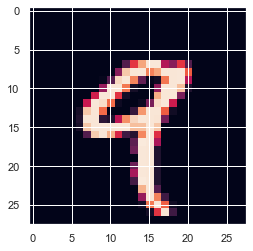

In [3]:
# Pick the fifth image from the dataset (it's a 9)
i = 4
image, label = images[i], labels[i]

# Print the image
output = Image.new("L", (28, 28))
output.putdata(image)
print(label)
plt.imshow(np.asarray(output))

In [4]:
# Splitting the data into training and testing samples
from sklearn.model_selection import train_test_split
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, train_size = 1000,
                                                                        test_size = 10000, random_state = 42)

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
images_train = scaler.fit_transform(images_train)
images_test = scaler.transform(images_test)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Set up classifier and train classifer
clf = RandomForestClassifier(n_estimators=500)
print(clf)
clf.fit(images_train, labels_train)

# Test classifier
predicted_labels = clf.predict(images_test)

# Evaluate classifier
print("Accuracy: ", accuracy_score(labels_test, predicted_labels))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy:  0.9003


In [63]:
%%time
accuracies = []
features = [1, 2, 4, 8, 12, 16, 32, 64, 112, 224, 248, 496, 600, 784]

num_trials = 1

dataObj = pd.DataFrame()
feature_list = []
accuracy_scores = []

for feature in features:
    print(feature)
    
    for t in range(num_trials):
        clf = RandomForestClassifier(n_estimators=500, max_features = feature, max_depth = 5, random_state = 42)
        clf.fit(images_train, labels_train)

        # Test classifier
        predicted_labels = clf.predict(images_test)

        # Evaluate classifier
        score = accuracy_score(labels_test, predicted_labels)
        accuracy_scores.append(score)
        feature_list.append(feature)
        
dataObj['Feature List'] = feature_list
dataObj['Accuracy'] = accuracy_scores      

1
2
4
8
12
16
32
64
112
224
248
496
600
784
CPU times: user 1min 12s, sys: 293 ms, total: 1min 12s
Wall time: 1min 12s


In [37]:
import seaborn as sns
sns.lineplot(x='Feature List', y='Accuracy',data = dataObj)
plt.title('Varying Max_Features for MNIST Data')
print(dataObj)

NameError: name 'dataObj' is not defined

In [52]:
%%time
accuracies = []
depths = [1, 2, 4, 8, 12, 14, 16, 25, 32]

num_trials = 25

dataObj = pd.DataFrame()
depth_list = []
accuracy_scores = []

for depth in depths:
    print(depth)
    
    for t in range(num_trials):
        clf = RandomForestClassifier(n_estimators=500, max_features = 10, max_depth = depth, random_state = 42)
        clf.fit(images_train, labels_train)

        # Test classifier
        predicted_labels = clf.predict(images_test)

        # Evaluate classifier
        score = accuracy_score(labels_test, predicted_labels)
        accuracy_scores.append(score)
        depth_list.append(depth)
        
dataObj['Depth List'] = depth_list
dataObj['Accuracy'] = accuracy_scores 

1
2
4
8
12
14
16
25
32
CPU times: user 7min 21s, sys: 6.19 s, total: 7min 28s
Wall time: 27min 7s


     Depth List  Accuracy
0             1    0.5542
1             1    0.5542
2             1    0.5542
3             1    0.5542
4             1    0.5542
..          ...       ...
220          32    0.9008
221          32    0.9008
222          32    0.9008
223          32    0.9008
224          32    0.9008

[225 rows x 2 columns]


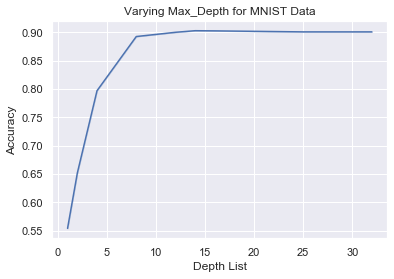

In [53]:
sns.lineplot(x='Depth List', y='Accuracy',data = dataObj)
plt.title('Varying Max_Depth for MNIST Data')
print(dataObj)

In [55]:
%%time
from sklearn.model_selection import GridSearchCV

# Set up classifier
clf = RandomForestClassifier(n_estimators = 500, random_state=42)

# Set up combinations of paramters to tune
param_grid = { 
    'max_features': [1, 2, 4, 8, 12, 16, 32, 64, 112, 224, 248, 496, 600, 784],
    'max_depth' : [1, 2, 4, 8, 12, 14, 16, 25, 32],
}

# Perform Grid Search Tuning
CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_clf.fit(images_train, labels_train)

CV_clf.best_params_

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CPU times: user 44min 38s, sys: 12.5 s, total: 44min 51s
Wall time: 53min 42s


{'max_depth': 12, 'max_features': 12}

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Set up classifier and train classifer
clf = RandomForestClassifier(n_estimators=500, max_features = 12, max_depth = 12, random_state = 42)
print(clf)
clf.fit(images_train, labels_train)

# Test classifier
predicted_labels = clf.predict(images_test)

# Evaluate classifier
print("Accuracy: ", accuracy_score(labels_test, predicted_labels))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features=12, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Accuracy:  0.8981


In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Set up classifier
clf = RandomForestClassifier(n_estimators = 500, random_state=42)

# Set up combinations of paramters to tune
param_grid = { 
    'max_features': np.linspace(1,784,784,dtype = int),
    'max_depth' : np.linspace(1,32,32,dtype = int),
}

CV_clf = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, n_iter = 200,
                            cv = 5, random_state=42)

CV_clf.fit(images_train, labels_train)

CV_clf.best_params_

KeyboardInterrupt: 

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Set up classifier and train classifer
clf = RandomForestClassifier(n_estimators=500, max_features = 11, max_depth = 29, random_state = 42)
print(clf)
clf.fit(images_train, labels_train)

# Test classifier
predicted_labels = clf.predict(images_test)

# Evaluate classifier
print("Accuracy: ", accuracy_score(labels_test, predicted_labels))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=29, max_features=11, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Accuracy:  0.9007
